In [1]:
from src.fem_radial import *
import matplotlib.pyplot as plt
import src.fem_radial
import importlib
from scipy.integrate import simps
from scipy.linalg import eigh
from scipy.sparse.linalg import cg
from scipy.sparse.linalg import eigsh
import numpy as np
from scipy.constants import eV, e, hbar, m_e, epsilon_0
import sys

sys.path.append("../")

importlib.reload(src.fem_radial)

In [2]:
xs = np.linspace(0, 1, 500)
xs = np.exp(1.1 * xs) - 1
xs /= xs[-1] * 1e9
fem = FemRadial(xs)

In [3]:
K = fem.get_K()
V = fem.get_V()
M = fem.get_M()

In [14]:
K

array([[ 2.24052240e-51, -2.24052240e-51,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.24052240e-51,  1.79143229e-50, -1.56738005e-50, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.56738005e-50,  5.82092888e-50, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.67847998e-45, -1.84329690e-45,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.84329690e-45,  1.84126215e-45,  2.03475477e-48],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.03475477e-48, -2.03475477e-48]])

In [15]:
V

array([7.26975811e-38, 7.26651950e-38, 7.25974006e-38, 7.24919645e-38,
       7.23500877e-38, 7.21735371e-38, 7.19641831e-38, 7.17238867e-38,
       7.14544625e-38, 7.11576645e-38, 7.08351813e-38, 7.04886343e-38,
       7.01195785e-38, 6.97295033e-38, 6.93198341e-38, 6.88919343e-38,
       6.84471072e-38, 6.79865979e-38, 6.75115954e-38, 6.70232348e-38,
       6.65225988e-38, 6.60107199e-38, 6.54885823e-38, 6.49571238e-38,
       6.44172370e-38, 6.38697719e-38, 6.33155368e-38, 6.27553002e-38,
       6.21897929e-38, 6.16197080e-38, 6.10457043e-38, 6.04684063e-38,
       5.98884060e-38, 5.93062642e-38, 5.87225121e-38, 5.81376519e-38,
       5.75521583e-38, 5.69664800e-38, 5.63810400e-38, 5.57962373e-38,
       5.52124480e-38, 5.46300255e-38, 5.40493026e-38, 5.34705911e-38,
       5.28941838e-38, 5.23203550e-38, 5.17493611e-38, 5.11814415e-38,
       5.06168194e-38, 5.00557027e-38, 4.94982843e-38, 4.89447432e-38,
       4.83952449e-38, 4.78499421e-38, 4.73089753e-38, 4.67724734e-38,
      

In [4]:
val, vec = eigsh((K + V)[:-2, :-2], 3, M[:-2, :-2], which="LA", sigma=-1e-10)
# val, vec = eigsh((K + V)[:-1, :-1], 1, M[:-1, :-1], which="SA")
vec = vec

In [5]:
integral_vec = [simps(v**2, xs[:-1]) for v in vec.T]
vec /= np.sqrt(integral_vec)

/tmp/ipykernel_126557/993141860.py:1: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_vec = [simps(v**2, xs[:-1]) for v in vec.T]


Text(0, 0.5, 'Wavefunction')

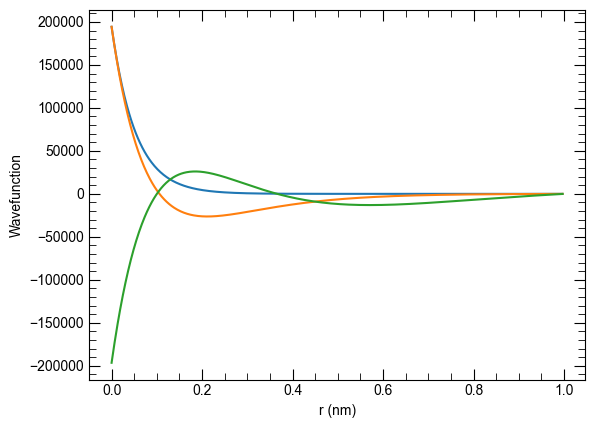

In [6]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, vec)
ax.set_xlabel("r (nm)")
ax.set_ylabel("Wavefunction")

In [7]:
n = vec[:, 0] ** 2
V_poisson = fem.get_V_poisson()
source_poisson = fem.get_source_poisson()[:-2, :-2] @ n

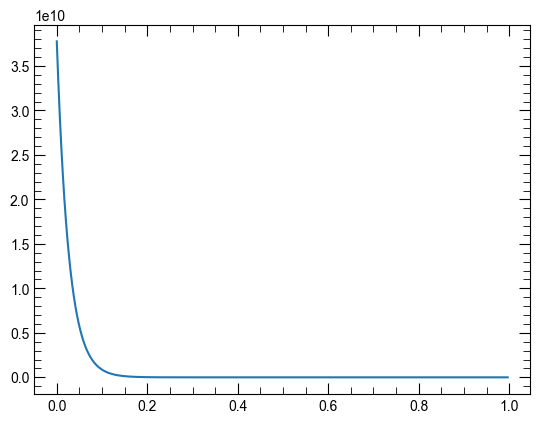

In [8]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, n)

In [9]:
source_poisson.shape

(499,)

In [10]:
V, info = cg(V_poisson[:-2, :-2], source_poisson)

In [11]:
info

0

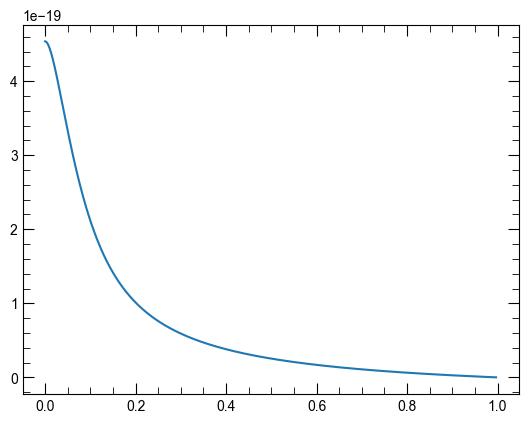

In [12]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, V / eV)

In [13]:
e**2 / (4 * np.pi * epsilon_0) / 1e-10 / eV

14.399645478425667